### Import the necessary libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

### Load the required stock data during mentioned period

In [2]:
# Load Dataset
def load_data(stock_symbol='AAPL', start='2018-01-01', end='2025-01-01'):
    df = yf.download(stock_symbol, start=start, end=end)
    return df

In [7]:
# df = load_data()

[*********************100%***********************]  1 of 1 completed


In [6]:
# df.to_csv('APPL2018_2022.csv')

In [3]:
import pandas as pd
df = pd.read_csv('APPL2018_2022.csv')

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.524349,40.533761,39.818596,40.030324,102223600
2018-01-03,40.517284,41.063069,40.453769,40.587860,118071600
2018-01-04,40.705486,40.808997,40.481999,40.590212,89738400
2018-01-05,41.168930,41.255972,40.710191,40.801939,94640000
2018-01-08,41.016010,41.312425,40.917202,41.016010,82271200


In [9]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-12-23,130.487778,131.041948,128.290879,129.557558,63814900
2022-12-27,128.676849,130.042493,127.380484,130.012807,69007800
2022-12-28,124.728363,129.666432,124.560134,128.320585,85438400
2022-12-29,128.261185,129.122126,126.400752,126.658041,75703700
2022-12-30,128.577896,128.597692,126.103920,127.073725,77034200


In [10]:
df1=df.reset_index()['Close']

In [11]:
df1

Ticker,AAPL
0,40.524349
1,40.517284
2,40.705486
3,41.168930
4,41.016010
...,...
1254,130.487778
1255,128.676849
1256,124.728363
1257,128.261185


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(818, 441)

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Stacked LSTM

In [55]:
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')


d:\Study\Coding\Projects\Stock Price Prediction\.code\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 0.0639 - val_loss: 0.0036
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.0016 - val_loss: 0.0078
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0010 - val_loss: 0.0070
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 8.6104e-04 - val_loss: 0.0072
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 9.0908e-04 - val_loss: 0.0030
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 8.8234e-04 - val_loss: 0.0054
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 7.8793e-04 - val_loss: 0.0088
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 8.4693e-04 - val_loss: 0.0024
Epoch 12/200
23/23 ━━

### Save and load models

In [64]:
#save the model    
# model.save('APPL2018_2022_3.keras')

In [18]:
from tensorflow.keras.models import load_model
model = load_model('APPL2018_2022_3.keras')

### Predict and evaluate

In [57]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
# Evaluate Model
def evaluate_model(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1, 1)
    y_pred = np.array(y_pred).reshape(-1, 1)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [60]:
 # Evaluation
mse, mae, r2 = evaluate_model(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict)
print('Model Evaluation Metrics on training data:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')



Model Evaluation Metrics on training data:
Mean Squared Error (MSE): 3.4830
Mean Absolute Error (MAE): 1.2501
R² Score: 0.9961


In [61]:
 # Evaluation
mse, mae, r2 = evaluate_model(scaler.inverse_transform(ytest.reshape(-1, 1)), test_predict)
print('Model Evaluation Metrics on testing data:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Model Evaluation Metrics on testing data:
Mean Squared Error (MSE): 14.4545
Mean Absolute Error (MAE): 2.9878
R² Score: 0.9056


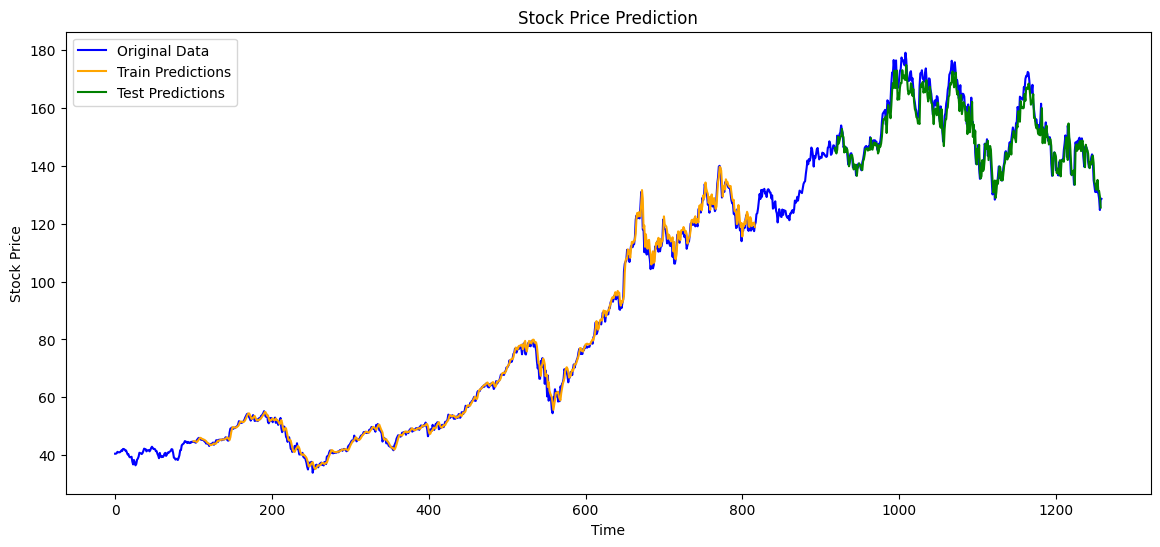

In [62]:
# Plotting Predictions and Baseline --> timesteps = 100
look_back = 100

# Create an empty array for train predictions
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Create an empty array for test predictions
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(14, 6))
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


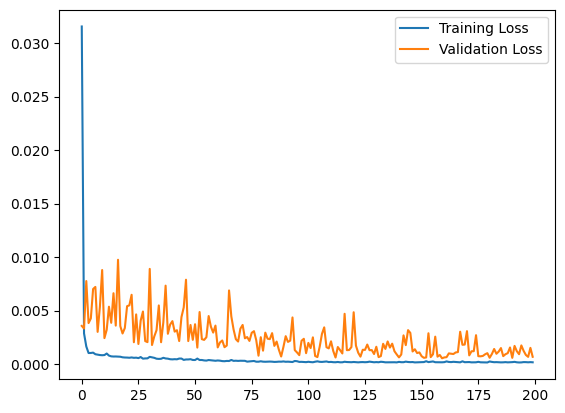

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


### Predicting the future price

In [19]:
len(test_data)

441

In [20]:
x_input=test_data[341:].reshape(1,-1) #coz timesteps = 100 --> 441 -100 = 341
x_input.shape

(1, 100)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [22]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6591316]
101
1 day input [0.91306677 0.93764228 0.94506264 0.94397336 0.95432102 0.95159802
 0.93369394 0.90680361 0.90448888 0.90653118 0.92355048 0.87991337
 0.86466426 0.84784947 0.83634419 0.84138212 0.82674557 0.81803174
 0.82776672 0.81755523 0.83736544 0.8786198  0.81333447 0.82334157
 0.80332716 0.79195846 0.81769128 0.83416594 0.81251751 0.80584608
 0.79012035 0.79243508 0.79917454 0.78610389 0.73599943 0.70686261
 0.73579524 0.76064328 0.76268558 0.75608197 0.71972928 0.72197577
 0.71217265 0.70781562 0.73947136 0.70808815 0.73552303 0.74464514
 0.74539396 0.74219446 0.76860808 0.78344892 0.80312276 0.78276822
 0.75179318 0.82626896 0.80993057 0.79161791 0.75335918 0.71149206
 0.7096509  0.71333311 0.71728807 0.68571634 0.76754372 0.78684126
 0.77715821 0.78915987 0.78063613 0.79379668 0.79768329 0.77531737
 0.79011446 0.79618332 0.77599922 0.74947341 0.72867569 0.77545363
 0.77736303 0.77395366 0.76590727 0.74054077 0.72710727 0.73876785
 0.73542651 0.75131457 0.75799736 

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [24]:
len(df1)


1259

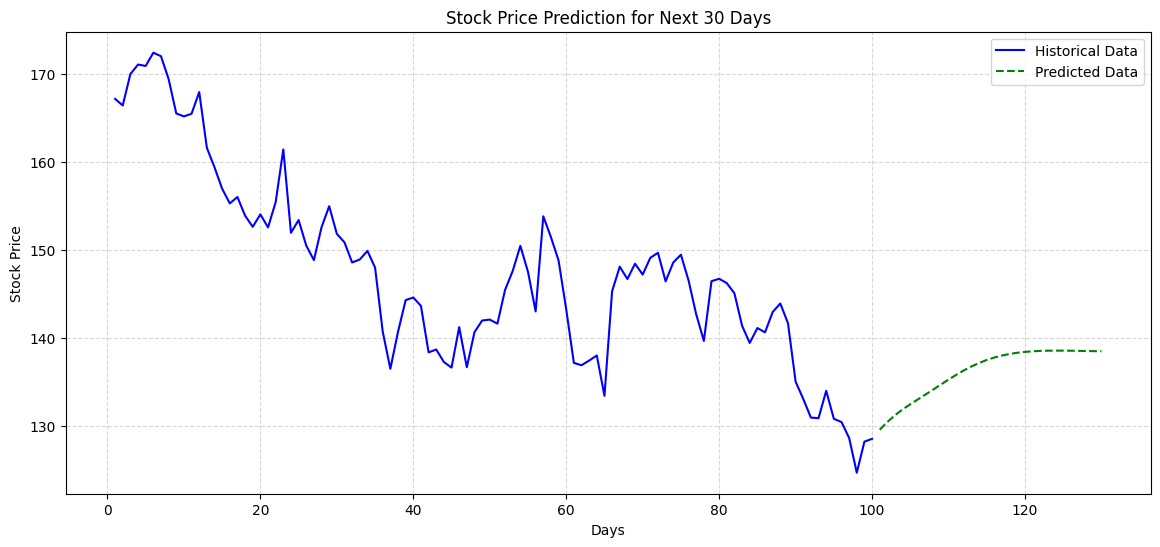

In [29]:
# Plot Historical Data (Last 100 Days)
plt.figure(figsize=(14, 6))
plt.plot(day_new, scaler.inverse_transform(df1[1159:]), color='blue', label='Historical Data')

# Plot Future Predictions (Next 30 Days)
plt.plot(day_pred, scaler.inverse_transform(lst_output), color='green', linestyle='--', label='Predicted Data')

# Add Title and Labels
plt.title('Stock Price Prediction for Next 30 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')

# Added Grid for Better Readability
plt.grid(True, linestyle='--', alpha=0.5)

#Legend
plt.legend()

# Show the Plot
plt.show()

### Combining the graphs of previos results with new outputs

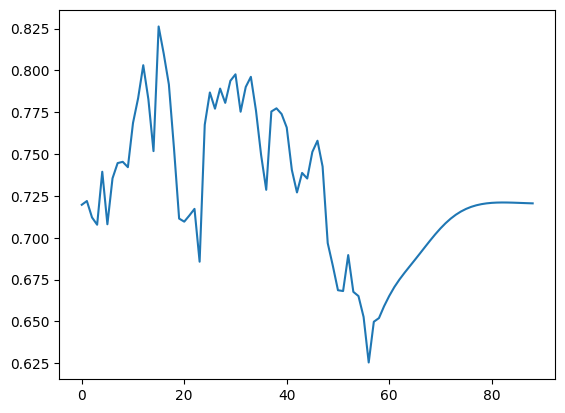

In [26]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

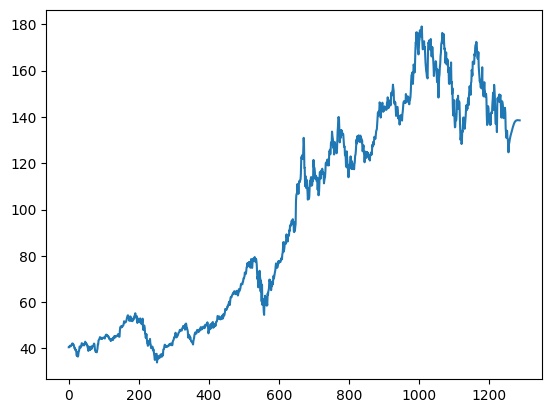

In [27]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)